# 1. Data validation

## 1.1 Code 💻

In [1]:
# Importing libraries & Setting Styles
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

sns.set(palette='deep')
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["axes.labelpad"] = 15
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.titlepad"] = 20

def format_yticks(value, _):
    if value >= 1000:
        value = f"{value/1000:.0f}k"
    return value

In [2]:
# Importing Dataset and Exploring
sales = pd.read_csv('product_sales.csv')
display(sales)
display(sales.info())
display(sales.describe())

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


None

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [3]:
# Fixing 'sales_method' column
sales['sales_method'] = sales['sales_method'].replace({'em + call':'Email + Call','email':'Email'})

# Fixing 'revenue' column
sales['revenue'] = sales['revenue'].fillna(sales['revenue'].mean())

# Fixing 'year_as_customer' column
sales.loc[sales['years_as_customer']>39,'years_as_customer'] = sales[sales['years_as_customer']<=39]['years_as_customer'].median()

## 1.2 Report 📒
The dataset initially contained **15000 rows and 8 columns** before undergoing cleaning and validation. Each column was thoroughly validated against the specified criteria outlined in the dataset table:

- **week:** The values in this column ranged between 1 and 6, aligning with the description indicating a six-week campaign. There were no missing values, so no cleaning is needed.
- **sales_method:** The column consisted of three distinct sales methods, and there were no missing values. However, some method names were mispronounced, the incorrect method names were replaced with the correct ones.
- **customer_id:** There were 15,000 unique customer IDs present in the dataset, and no null values were found. No cleaning is needed.
- **nb_sold:** This column contained numeric values without any missing data, which matched the description. No cleaning is needed.
- **revenue:** Out of the 15000 numeric values in this column, 1,074 were missing. To address this, the missing values were filled with the mean value calculated from the available revenues.
- **years_as_customer:** All 15000 entries in this numeric column were present, and there were no missing values. However, since the company is only 39 years old, it was not possible to have values more than 39. Two such error values were identified and replaced with the median value of the respective column.
- **nb_site_visits:** The column contained 15000 numeric values, and no missing records were found. No cleaning is needed.
- **state:** There were 50 unique state names recorded in this column, and no missing values were detected. No cleaning is needed.

After completing the data validation process, the dataset now consists of **15000 rows and 8 columns**, with no missing values present.

# 2. Analyzing Customers and Revenue for each Sales Method

## 2.1 Code 💻

Text(0.5, 1.0, 'Number of Customers For Each Sales Method')

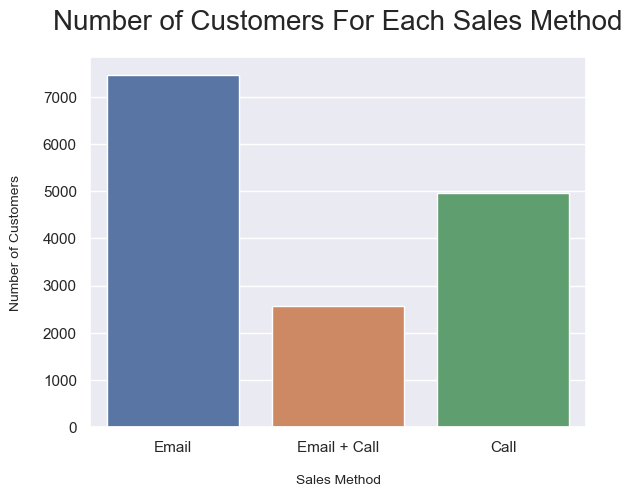

In [4]:
# Graph of Number of Customers For Each Sales Method
methods = sales['sales_method'].value_counts()

ax21 = sns.barplot(x=methods.index, y=methods.values,order=sales['sales_method'].unique())
ax21.set_xlabel("Sales Method")
ax21.set_ylabel("Number of Customers")
ax21.set_title("Number of Customers For Each Sales Method")

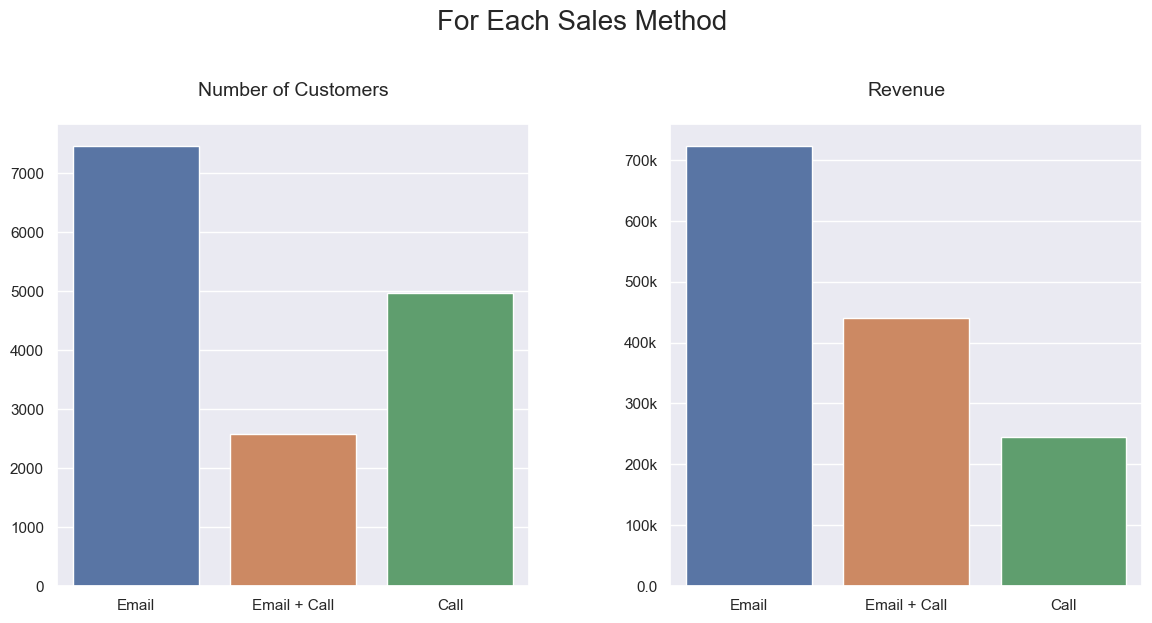

In [5]:
# Graph of Comparing Number of Customers And Revenue For Each Sales Method
fig, ax2 = plt.subplots(1,2,figsize=(14,6))

sns.barplot(x=methods.index, y=methods.values,order=sales['sales_method'].unique(), ax=ax2[0])
ax2[0].set_xlabel(None)
ax2[0].set_ylabel(None)
ax2[0].set_title("Number of Customers",fontsize=14)

sns.barplot(data=sales, x='sales_method', y='revenue', errorbar=None, estimator='sum', order=sales['sales_method'].unique(), ax=ax2[1])
ax2[1].set_xlabel(None)
ax2[1].set_ylabel(None)
ax2[1].set_title("Revenue",fontsize=14)
ax2[1].yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))

plt.suptitle("For Each Sales Method",fontsize=20,y=1.07)
plt.subplots_adjust(wspace=.3)
plt.show()

## 2.2 Report 📒
During the past six weeks, we have implemented a campaign to boost sales of our newly launched stationary products. We have utilized three different strategies: "Email," "Call," and "Email + Call." To optimize revenue while considering resource allocation, it is crucial to determine the most effective strategy. The "Email" method requires the least amount of resources, while "Email + Call" demands additional time and manpower. On the other hand, the "Call" method necessitates the highest investment of time and resources.


Our analysis reveals that the "Email" method proved to be the most successful in attracting customers. Nearly 50% of our customers were acquired through this strategy for our stationary product. Following behind is the "Calling" method, and in the end "Email + Call" combined method.

</br></br>![image21](image21.png)</br></br>

But when we examine the revenue generated by each method beside number of customers, it becomes evident that "Email" remains the most profitable strategy by a significant margin. However, it is interesting to note that the combined strategy of "Email + Call" generates more revenue compared to the "Call" method alone, despite having only half the number of customers.

</br></br>![image2](image2.png)</br></br>

This suggests that the "Email + Call" strategy is more effective in maximizing revenue, than the "Call" strategy. Nevertheless, **"Email" excels in both customer acquisition and revenue generation** simultaneously.

# 3. Distribution of Revenue Overall and for each Method

## 3.1 Code 💻

Text(0.5, 1.0, 'Distribution of Revenue')

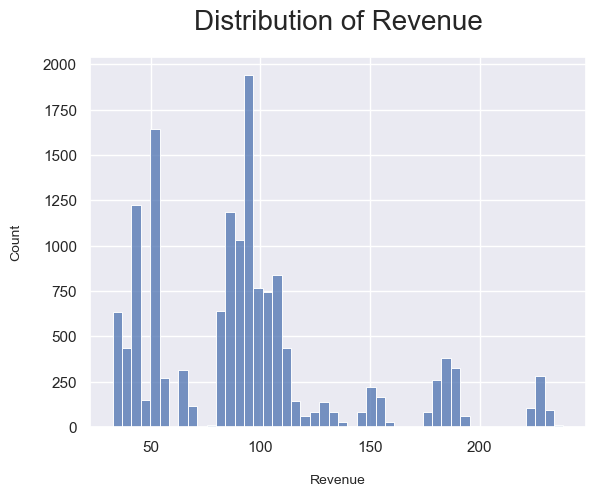

In [6]:
# Distribution of Revenue Graph
ax31 = sns.histplot(data=sales,x='revenue')
ax31.set_xlabel("Revenue")
ax31.set_title("Distribution of Revenue")

Text(0.5, 1.0, 'Distribution of Revenue for Each Sales Method')

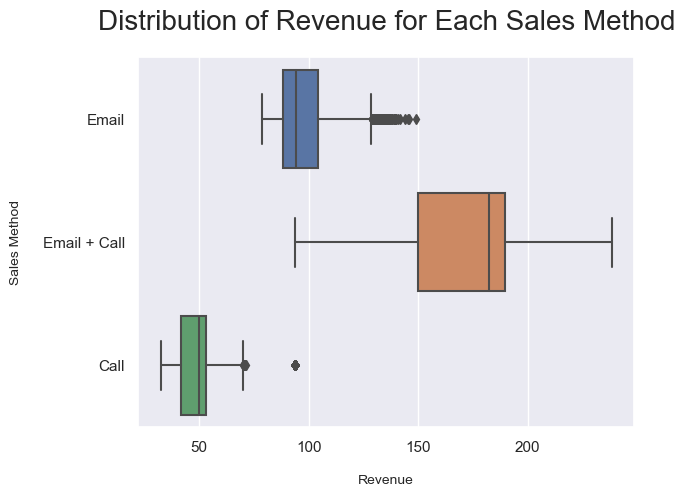

In [7]:
# Distribution of Revenue for Each Sales Method Graph 
ax32 = sns.boxplot(data=sales,x='revenue',y='sales_method')
ax32.set_xlabel("Revenue")
ax32.set_ylabel("Sales Method")
ax32.set_title("Distribution of Revenue for Each Sales Method")

## 3.2 Report 📒
I've analyzed the revenue we got in the last 6 weeks, where I observed a multimodal distribution graph. It revealed two prominent spikes, indicating that a significant portion of our customers made purchases of approximately 50\$ or 100\$ worth of products. We also noticed smaller spikes around 180\$. Although this distribution didn't provide us with substantial insights.
</br></br>![image31](image31.png)</br></br>

To gain a deeper understanding of these patterns, we examined the multiple boxplot shown below. It shed light on the revenue distribution across different sales methods. The majority of revenue generated through the "Email" method falls around 100\$, while the "Call" method generates revenue around 50\$. On the other hand, the "Email + Call" method tends to result in revenues ranging from 150\$ to 180\$.
</br></br>![image32](image32.png)</br></br>

This analysis suggests that, on average, the **"Email + Call" method generates the highest revenue per customer**. On the second place "Email" method occasionally matches the revenue of the "Email + Call" method, while the "Call" method trails behind in terms of revenue generation.

# 4. Difference in Revenue over the weeks

## 4.1 Code 💻

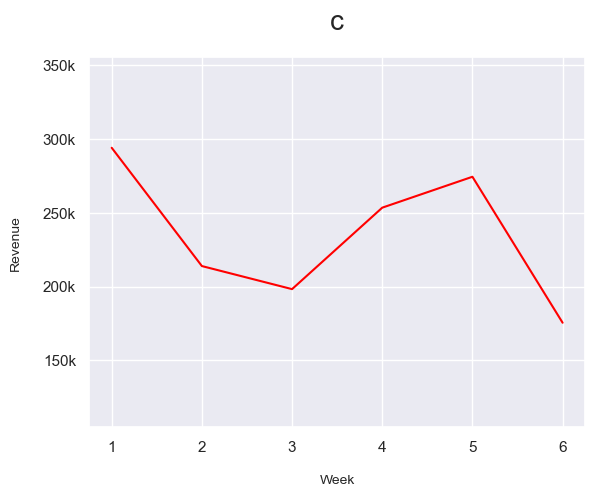

In [8]:
# Revenue over the Weeks Graph
ax41 = sns.lineplot(data=sales,x='week',y='revenue',errorbar=None,color='red',estimator='sum')
ax41.set_ylim(105000,355000)
ax41.set_xlabel("Week")
ax41.set_ylabel("Revenue")
ax41.set_title("c")
ax41.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))

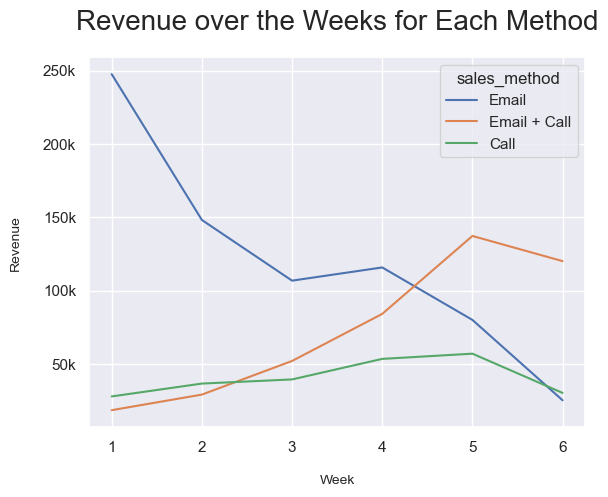

In [9]:
# Revenue over the Weeks for Each Method Graph
ax42 = sns.lineplot(data=sales,x='week',y='revenue',hue='sales_method',errorbar=None,estimator='sum')
ax42.set_xlabel("Week")
ax42.set_ylabel("Revenue")
ax42.set_title("Revenue over the Weeks for Each Method")
ax42.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))

## 4.2 Report 📒
The lineplot below showcases the revenue trends over the weeks. Initially, the revenue was reaching high levels. However, after the first week, we observed a gradual decline until the third week. Following this, there was a notable increase in revenue for two weeks, followed by another decline. It is worth noting that during the third week,in the "Email" method we've sent a second email to customers, which coincided with the sudden growth in revenue.
</br></br>![image41](image41.png)</br></br>

To gain further insights, we analyzed the lineplot, focusing on the revenue trends for each strategy separately. The "Email" strategy displayed a consistent decline in revenue over time, except during the weeks when emails were sent. On the other hand, the "Email + Call" method demonstrated a progressive increase in revenue, surpassing the revenue generated by the "Email" strategy between week four and five. Meanwhile, the "Call" method as expected, yielded the lowest revenue throughout the entire period.
</br></br>![image42](image42.png)</br></br>

Observing the revenue trends, it can be concluded that the overall revenue exhibits a decreasing pattern. The "Email" method holds the most significant influence on revenue,but this method fails to exhibit sustained growth over the weeks causing the overall decrease in revenue.

To optimize our sales strategies, we should consider discontinuing the "Call" method due to its higher costs and lower revenue generation. The "Email" method has shown to be effective in attracting more customers and generating overall revenue. However, the "Email + Call" method proves to be more profitable per customer. **Considering the ease and efficiency of the "Email" method, our primary focus should be on enhancing its performance.** If resources permit, we can also utilize the "Email + Call" method to further enhance our results.

# 5. Other Factors

## 5.1 Code 💻

In [10]:
# Creating DataFrame for States by Total Revenue Graph
sales_by_state = pd.DataFrame(sales.groupby(['state','sales_method'])['revenue'].sum()).reset_index()
sales_by_state = sales_by_state.pivot_table(index='state',columns='sales_method',values='revenue')
sales_by_state['total_revenue'] = sales_by_state.sum(axis=1)
sales_by_state = sales_by_state.sort_values('total_revenue',ascending=True).iloc[30:]

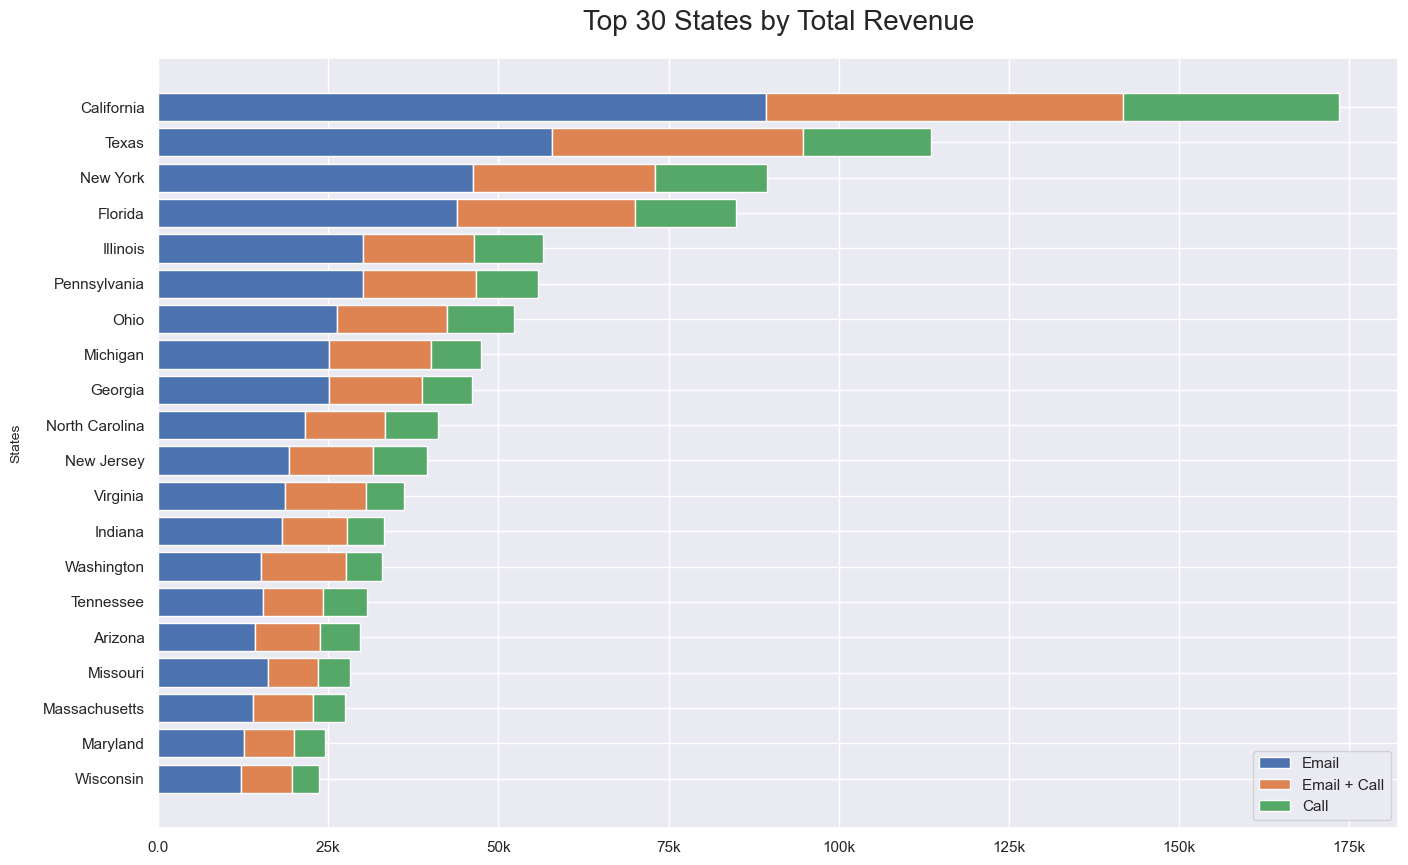

In [11]:
# Top 30 States by Total Revenue Graph
fig,ax51=plt.subplots(figsize=(16,10))

ax51 =  plt.barh(sales_by_state.index, sales_by_state['Email'], label='Email')
ax51 = plt.barh(sales_by_state.index, sales_by_state['Email + Call'], left=sales_by_state['Email'], label='Email + Call')
ax51 = plt.barh(sales_by_state.index, sales_by_state['Call'], left=np.add(sales_by_state['Email'], sales_by_state['Email + Call']), label='Call')

plt.legend()
plt.ylabel('States')
plt.title('Top 30 States by Total Revenue')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))

## 5.2 Report 📒
Upon further analysis, an additional trend emerged from the dataset. The following horizontal bar plot below illustrates the total revenue generated in various states and the contribution of each method. No significant variation was observed among the methods. However, it is evident that **"California," "Texas," "New York," and "Florida"** yielded substantially higher revenue compared to other states. To capitalize on this lucrative opportunity, it is advisable to **prioritize expanding our networking in these states**, investing additional resources and effort to meet the heightened demand.
</br></br>
![image51](image51.png)
</br></br>

# 6. Business Metrics
To optimize the sales of our new line of office stationery and achieve our revenue target, I propose using the **revenue over the weeks** metric as our primary indicator.

Based on our last 6 week data, we observed a total revenue over \$200k per week most of the time. Therefore, if this number is increasing next few weeks, it will serve as a strong indicator of our success in maximizing sales and achieving our objectives.

# 7. Recommendation
For the following weeks, I would recommend we can focus on the following steps:

- By closely monitoring key metrics, we can track the revenue trend to determine if it is increasing or not.
- It is advisable to concentrate our efforts on the "Email" method.
    - Maintain a regular cadence of sending emails every two to three weeks.
    - Enhance the quality of advertisements included in these emails to attract more customers.
- To maximize our marketing efforts, it is recommended to intensify our efforts in "California," "Texas," "New York," and "Florida". If we have resource using "Email + Call" method use this alongside "Email" method, as it gives higher revenue per customer and these states have higher chances of getting customer.
- To gain more insights, it would be beneficial to gather additional information like "customer satisfaction", "their needs" for further research.